# 目标
- 使用固定阈值、自适应阈值和Otsu阈值法”二值化”图像
- OpenCV函数：cv2.threshold(), cv2.adaptiveThreshold()

## 固定阈值分割
固定阈值分割很直接，一句话说就是像素点值大于阈值变成一类值，小于阈值变成另一类值
![](http://blog.codec.wang/cv2_threshold_binary_demo.jpg)

In [1]:
import cv2

# 灰度图读入
img = cv2.imread('gradient.jpg', 0)

# 阈值分割
ret, th = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('thresh', th)
cv2.waitKey(0)

-1

cv2.threshold()用来实现阈值分割，ret是return value缩写，代表当前的阈值，暂时不用理会。函数有4个参数：
- 参数1：要处理的原图，一般是灰度图
- 参数2：设定的阈值
- 参数3：最大阈值，一般为255
- 参数4：阈值的方式，主要有5种，详情：ThresholdTypes

下面结合代码理解下这5种阈值方式：

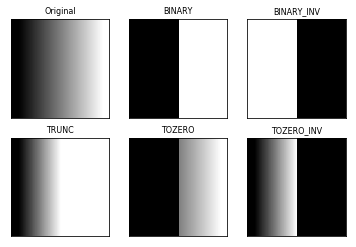

In [3]:
import matplotlib.pyplot as plt

# 应用5种不同的阈值方法
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

# 使用Matplotlib显示
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴

plt.show()

经验之谈：很多人误以为阈值分割就是二值化。从上图中可以发现，两者并不等同，阈值分割结果是两类值，而不是两个值，所以教程开头我把二值化加了引号。
![](http://blog.codec.wang/cv2_different_thresholds_theory.jpg)

## 自适应阈值
看得出来固定阈值是在整幅图片上应用一个阈值进行分割，它并不适用于明暗分布不均的图片。

cv2.adaptiveThreshold()自适应阈值会每次取图片的一小部分计算阈值，这样图片不同区域的阈值就不尽相同。它有5个参数，其实很好理解，先看下效果：

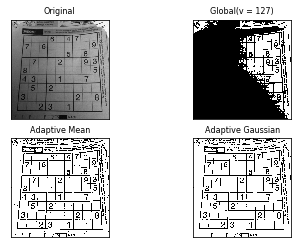

In [10]:
# 自适应阈值对比固定阈值
img = cv2.imread('sudoku.jpg', 0)
# 固定阈值
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# 自适应阈值
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 6)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17, 8)

titles = ['Original', 'Global(v = 127)', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]),plt.yticks([])
plt.show()

cv2.adaptiveThreshold()
- 参数1：要处理的原图
- 参数2：最大阈值，一般为255
- 参数3：小区域阈值的计算方式
 - ADAPTIVE_THRESH_MEAN_C：小区域内取均值
 - ADAPTIVE_THRESH_GAUSSIAN_C：小区域内加权求和，权重是个高斯核
- 参数4：阈值方式（跟前面讲的那5种相同）
- 参数5：小区域的面积，如11就是11*11的小块
- 参数6：最终阈值等于小区域计算出的阈值再减去此值

## Otsu阈值
在前面固定阈值中，我们是随便选了一个阈值如127，那如何知道我们选的这个阈值效果好不好呢？答案是：不断尝试，所以这种方法在很多文献中都被称为经验阈值。Otsu阈值法就提供了一种自动高效的二值化方法，不过我们直方图还没学，这里暂时略过。

好吧，我知道我激起了你的兴趣，~ o(￣▽￣)o，有能力的童鞋可以看下练习题。

# 小结
- cv2.threshold()用来进行固定阈值分割。固定阈值不适用于光线不均匀的图片，所以用 cv2.adaptiveThreshold()进行自适应阈值分割。
- 二值化跟阈值分割并不等同。针对不同的图片，可以采用不同的阈值方法。
